In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,re,sys
import seaborn as sns


os.chdir("D:/hackathon/timeseries/stock-time-series-20050101-to-20171231/")
%matplotlib inline

In [4]:
data1=pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'], index_col='Date')
data1.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [5]:
# plt.subplots(figsize=(14,4))
# plt.plot(data1.Close,label = 'Close Price')
# plt.plot(data1.Volume,label = 'Volume',secondary_y=True)

# #data1.Volume.plot(secondary_y=True)

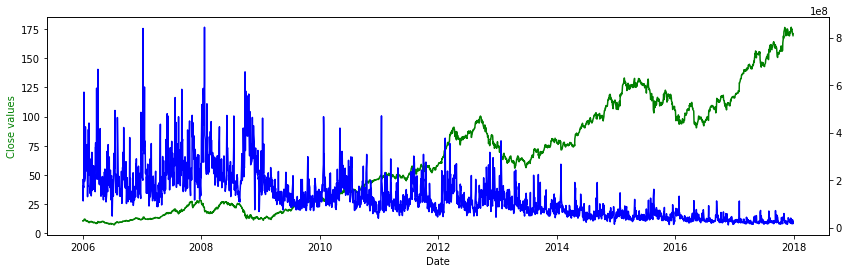

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = data1.index
y1 = data1.Close
y2 = data1.Low

y3 = data1.Volume

fig, ax1 = plt.subplots( )

ax3 = ax1.twinx()
ax1.plot(x, y1, 'g-')

ax3.plot(x, y3, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close values', color='g')

plt.show()

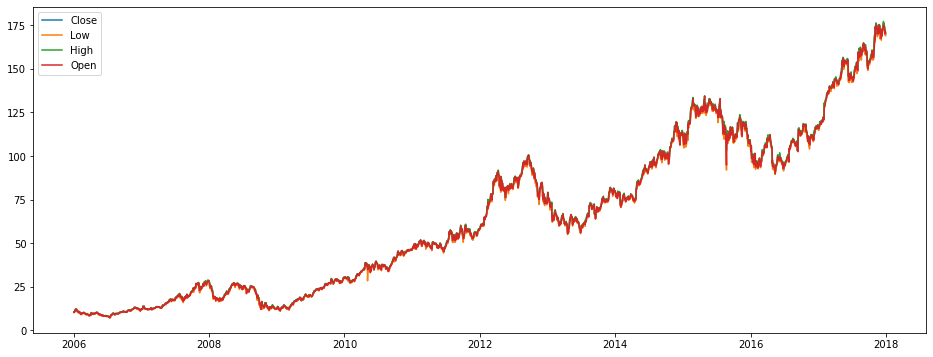

In [8]:
import numpy as np
import matplotlib.pyplot as plt


x = data1.index
y1 = data1.Close
y2 = data1.Low
y3 = data1.High
y4 = data1.Open


plt.figure(figsize=(16,6))
plt.plot(y1,label='Close');
plt.plot(y2,label='Low');
plt.plot(y3,label='High');
plt.plot(y4,label='Open');

plt.legend();

plt.show()

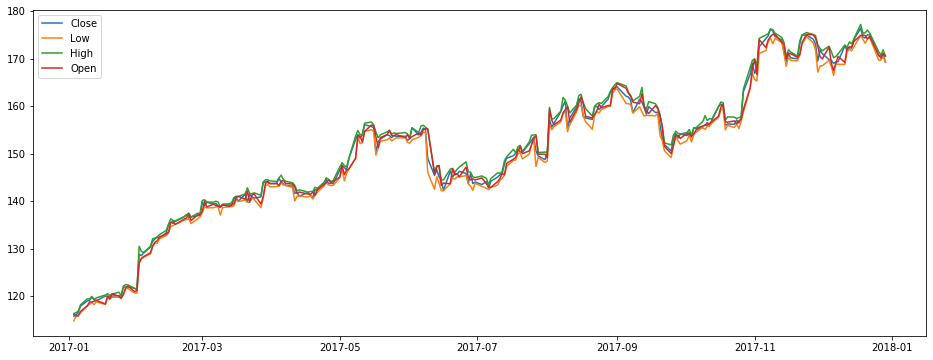

In [9]:
x = data1['2017'].index
y1 = data1['2017'].Close
y2 = data1['2017'].Low
y3 = data1['2017'].High
y4 = data1['2017'].Open


plt.figure(figsize=(16,6))
plt.plot(y1,label='Close');
plt.plot(y2,label='Low');
plt.plot(y3,label='High');
plt.plot(y4,label='Open');

plt.legend();

plt.show()

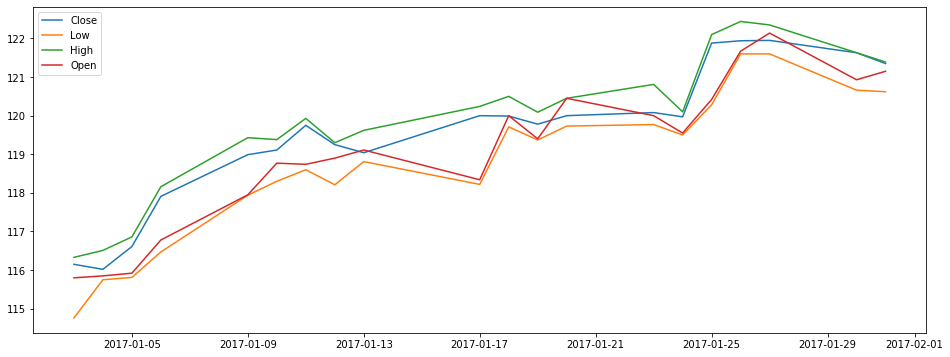

In [10]:
x = data1['01-2017'].index
y1 = data1['01-2017'].Close
y2 = data1['01-2017'].Low
y3 = data1['01-2017'].High
y4 = data1['01-2017'].Open


plt.figure(figsize=(16,6))
plt.plot(y1,label='Close');
plt.plot(y2,label='Low');
plt.plot(y3,label='High');
plt.plot(y4,label='Open');

plt.legend();

plt.show()

### Concepts of Time series

* Stationarity : 
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

*  constant mean
*  constant variance
*  an autocovariance that does not depend on time.

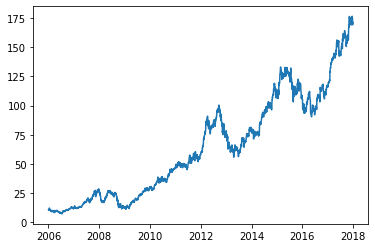

In [11]:
plt.plot(data1['Close'])


In [249]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [250]:
rolling_mean = train['Close'].rolling(window=10).mean()

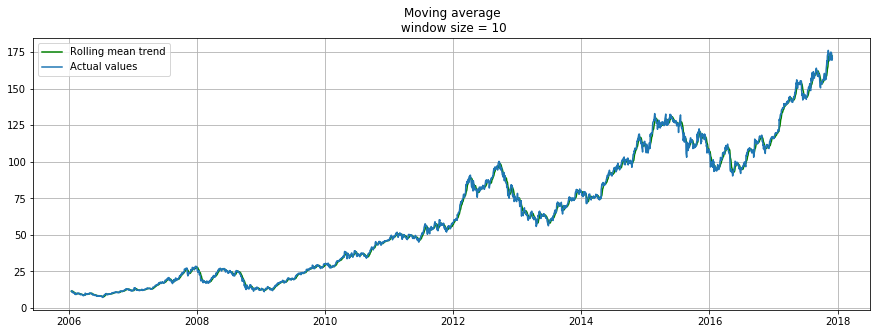

In [255]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
plotMovingAverage(train['Close'],10,plot_intervals=False,plot_anomalies=True)

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
train = data1.loc['2006-01-03':'2017-12-01']
test = data1.loc['2017-12-01':]

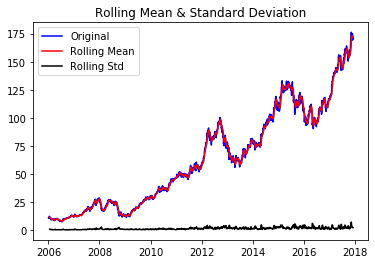

Results of Dickey-Fuller Test:
Test Statistic                    0.644622
p-value                           0.988665
#Lags Used                       22.000000
Number of Observations Used    2977.000000
Critical Value (1%)              -3.432549
Critical Value (5%)              -2.862511
Critical Value (10%)             -2.567287
dtype: float64


In [182]:
test_stationarity(train['Close'])


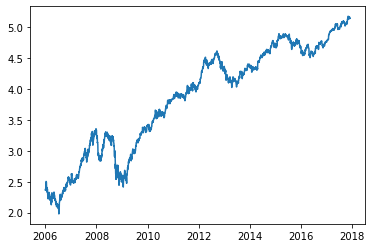

In [183]:
ts_log = np.log(train['Close'])
plt.plot(ts_log)

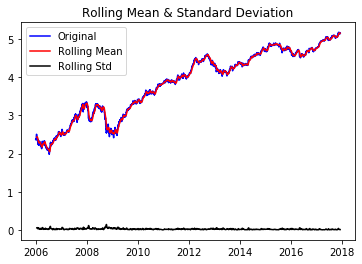

Results of Dickey-Fuller Test:
Test Statistic                   -0.758312
p-value                           0.831062
#Lags Used                        6.000000
Number of Observations Used    2993.000000
Critical Value (1%)              -3.432537
Critical Value (5%)              -2.862506
Critical Value (10%)             -2.567284
dtype: float64


In [184]:
test_stationarity(ts_log)

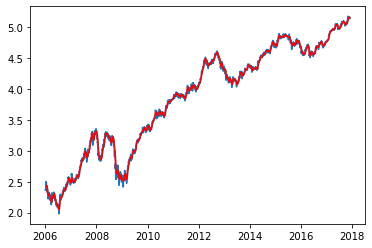

In [185]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [186]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2006-01-03        NaN
2006-01-04        NaN
2006-01-05        NaN
2006-01-06        NaN
2006-01-09        NaN
2006-01-10        NaN
2006-01-11        NaN
2006-01-12        NaN
2006-01-13        NaN
2006-01-17        NaN
2006-01-18        NaN
2006-01-19   -0.00804
Name: Close, dtype: float64

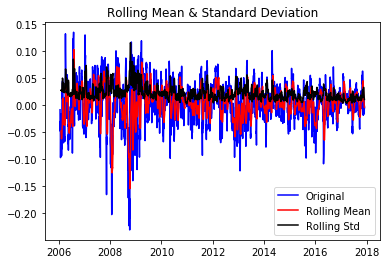

Results of Dickey-Fuller Test:
Test Statistic                -1.106500e+01
p-value                        4.705734e-20
#Lags Used                     1.600000e+01
Number of Observations Used    2.972000e+03
Critical Value (1%)           -3.432552e+00
Critical Value (5%)           -2.862513e+00
Critical Value (10%)          -2.567288e+00
dtype: float64


In [187]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

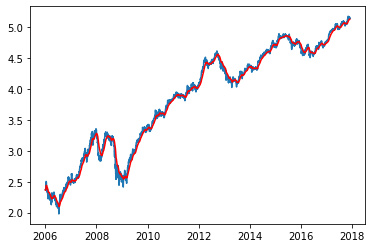

In [188]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

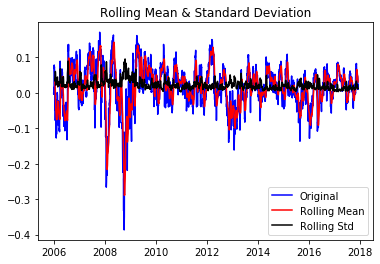

Results of Dickey-Fuller Test:
Test Statistic                -7.999692e+00
p-value                        2.352078e-12
#Lags Used                     6.000000e+00
Number of Observations Used    2.993000e+03
Critical Value (1%)           -3.432537e+00
Critical Value (5%)           -2.862506e+00
Critical Value (10%)          -2.567284e+00
dtype: float64


In [189]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


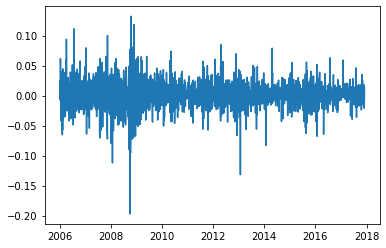

In [190]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

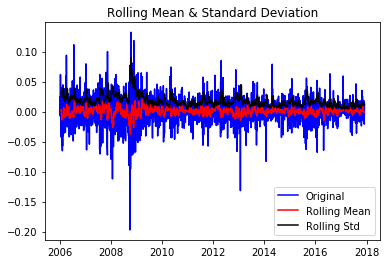

Results of Dickey-Fuller Test:
Test Statistic                  -22.430624
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    2993.000000
Critical Value (1%)              -3.432537
Critical Value (5%)              -2.862506
Critical Value (10%)             -2.567284
dtype: float64


In [191]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

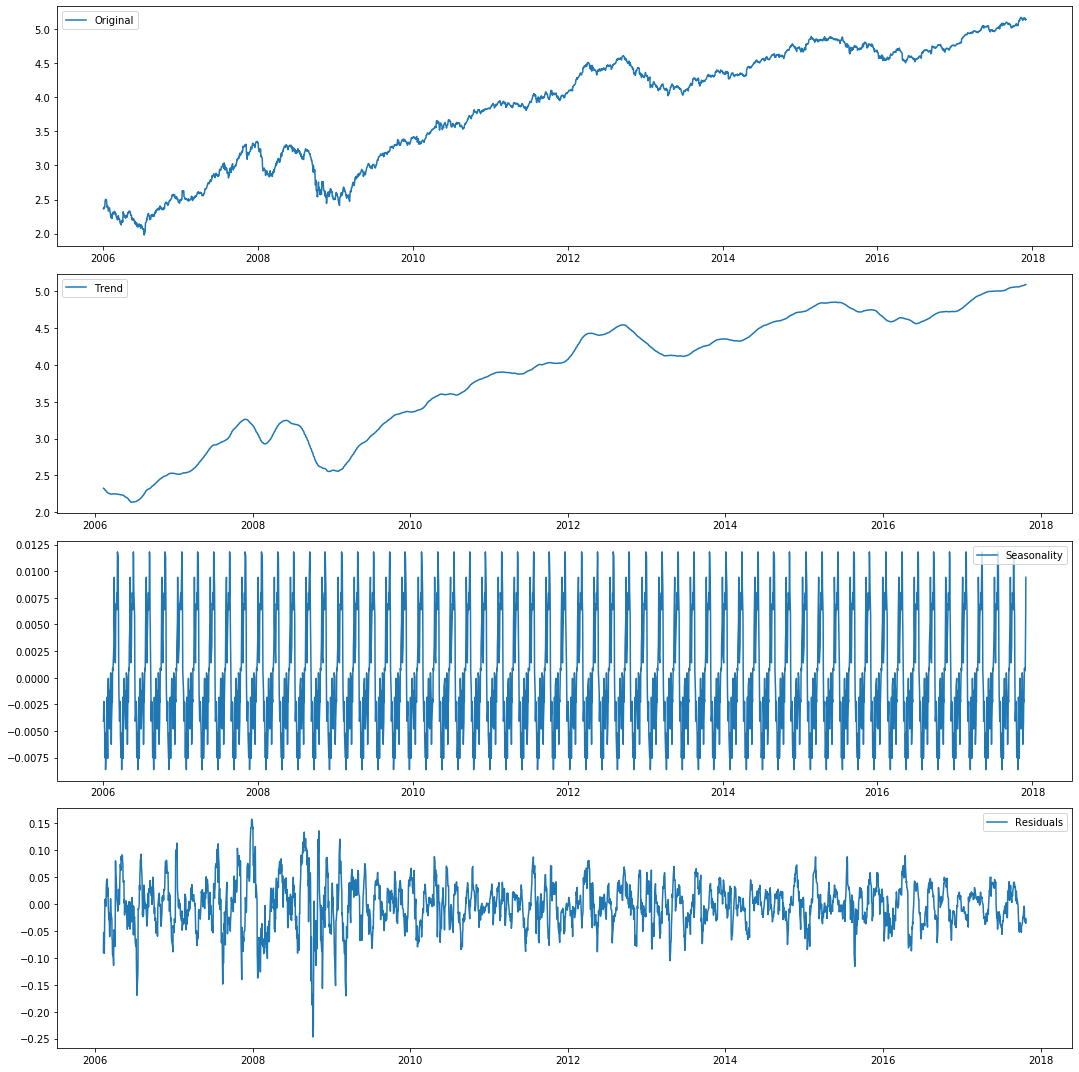

In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplots(figsize = (15,15))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

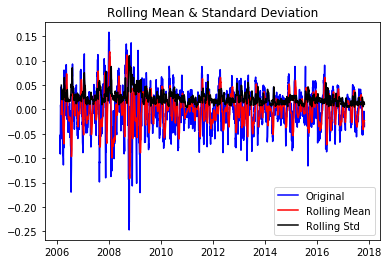

Results of Dickey-Fuller Test:
Test Statistic                -1.417001e+01
p-value                        2.010934e-26
#Lags Used                     1.700000e+01
Number of Observations Used    2.930000e+03
Critical Value (1%)           -3.432584e+00
Critical Value (5%)           -2.862527e+00
Critical Value (10%)          -2.567295e+00
dtype: float64


In [196]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [197]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf


In [198]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


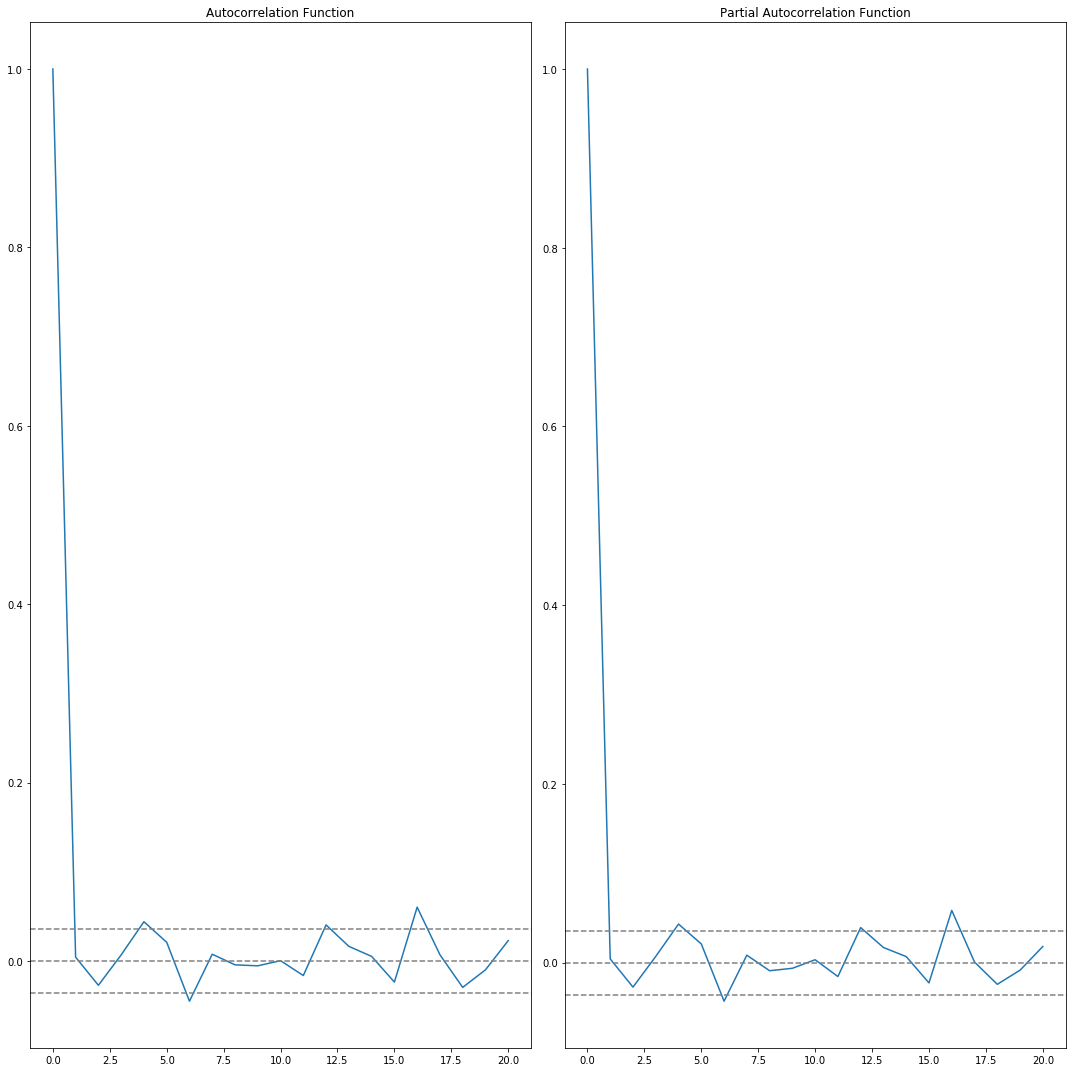

In [199]:
#Plot ACF: 
plt.subplots(figsize= (15,15))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [200]:
from statsmodels.tsa.arima_model import ARIMA


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\U

Text(0.5, 1.0, 'RSS: 1.2555')

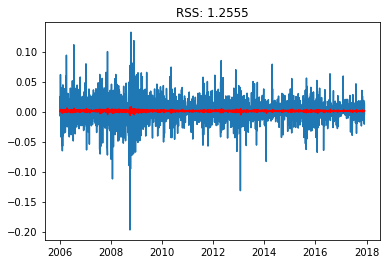

In [201]:
model = ARIMA(ts_log, order=(4, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.2557')

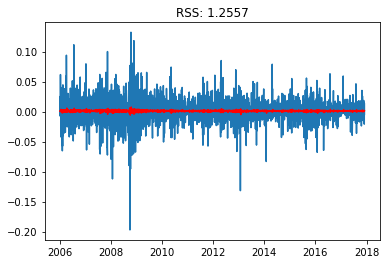

In [202]:
model = ARIMA(ts_log, order=(0, 1, 4))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: nan')

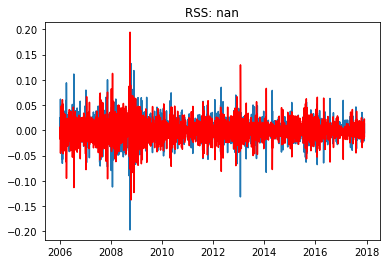

In [205]:
model = ARIMA(ts_log, order=(2, 2, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [206]:
ts_log_diff

Date
2006-01-04    0.002805
2006-01-05   -0.007498
2006-01-06    0.025083
2006-01-09   -0.003676
2006-01-10    0.061599
                ...   
2017-11-27   -0.005042
2017-11-28   -0.005876
2017-11-29   -0.020961
2017-11-30    0.013887
2017-12-01   -0.004666
Name: Close, Length: 2999, dtype: float64

In [100]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2006-01-05   -2.006244e-08
2006-01-06    5.230630e-03
2006-01-09   -1.851526e-02
2006-01-10    8.226282e-03
2006-01-11   -4.824180e-02
dtype: float64


In [101]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2006-01-05   -2.006244e-08
2006-01-06    5.230610e-03
2006-01-09   -1.328465e-02
2006-01-10   -5.058373e-03
2006-01-11   -5.330018e-02
dtype: float64


In [102]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2006-01-03    2.368373
2006-01-04    2.368373
2006-01-05    2.368373
2006-01-06    2.373603
2006-01-09    2.355088
dtype: float64

Text(0.5, 1.0, 'RMSE: 4.8686')

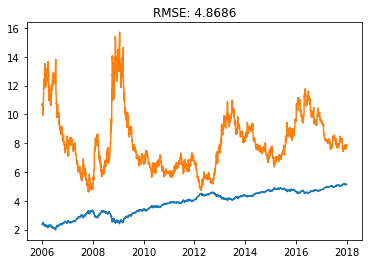

In [103]:
ts=data1['Close']
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_log)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_log)**2)/len(ts_log)))

In [86]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh',title=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [ ]:
np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
limit=12    
_ = tsplot(x, lags=limit,title="AR(1)process")


In [ ]:
auto_arima()

In [216]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train['Close'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=11563.512, BIC=11593.501, Fit time=40.743 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=16734.402, BIC=16746.397, Fit time=0.535 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=14073.521, BIC=14097.512, Fit time=7.445 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=11541.353, BIC=11565.344, Fit time=32.262 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=10700.415, BIC=10730.403, Fit time=40.611 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 0, 12); AIC=12848.485, BIC=12872.476, Fit time=43.447 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 2, 12); AIC=9786.156, BIC=9822.142, Fit time=130.848 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 2, 12); AIC=9920.714, BIC=9962.697, Fit time=105.678 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 2, 2, 12); AIC=11571.350, BIC=11601.338, Fit time=103.774 seconds
Fit 

In [217]:
print(stepwise_model.aic())


9735.857948559185


In [218]:
stepwise_model

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 2, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [172]:
data1.index.max(),data1.index.min()

(Timestamp('2017-12-29 00:00:00'), Timestamp('2006-01-03 00:00:00'))

In [173]:
train = data1.loc['2006-01-03':'2017-12-01']
test = data1.loc['2017-12-01':]

In [219]:
len(test)

20

In [220]:
test

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-01,169.95,171.67,168.50,171.05,39759288,AAPL
2017-12-04,172.48,172.62,169.63,169.80,32542385,AAPL
2017-12-05,169.06,171.52,168.40,169.64,27350154,AAPL
2017-12-06,167.50,170.20,166.46,169.01,28560000,AAPL
2017-12-07,169.03,170.44,168.91,169.32,25673308,AAPL
2017-12-08,170.49,171.00,168.82,169.37,23355231,AAPL
2017-12-11,169.20,172.89,168.79,172.67,35273759,AAPL
2017-12-12,172.15,172.39,171.46,171.70,19409230,AAPL
2017-12-13,172.50,173.54,172.00,172.27,23818447,AAPL


In [175]:
decomposition = seasonal_decompose(train['Close'],freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

stepwise_model.fit(residual)


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [221]:
stepwise_model.fit(train['Close'])


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 2, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [222]:
future_forecast = stepwise_model.predict(n_periods=20)

In [223]:
#residual.dropna(inplace=True)

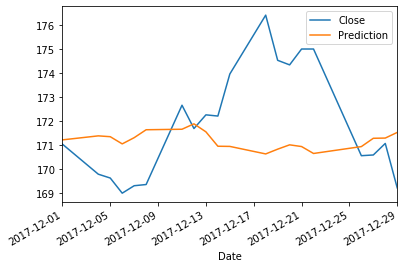

In [224]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
pd.concat([test['Close'],future_forecast],axis=1).plot()

In [225]:
pd.concat([test['Close'],future_forecast],axis=1)

,Close,Prediction
Date,,
2017-12-01,171.05,171.228440
2017-12-04,169.80,171.395397
2017-12-05,169.64,171.360615
2017-12-06,169.01,171.061466
2017-12-07,169.32,171.320144
2017-12-08,169.37,171.649856
2017-12-11,172.67,171.670945
2017-12-12,171.70,171.895761
2017-12-13,172.27,171.562945


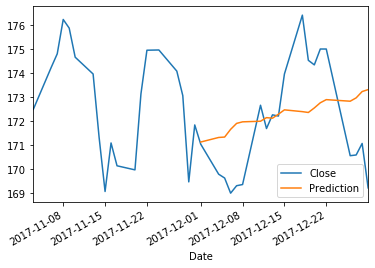

In [215]:
pd.concat([data1.loc['2017-11-03':]['Close'],future_forecast],axis=1).plot()


In [231]:
import pandas as pd
#import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
data.index = data['time'];

data.columns=['driver','time','value']


In [232]:
data

,driver,time,value
time,,,
1969.000000,1,1969.000000,1687
1969.083333,2,1969.083333,1508
1969.166667,3,1969.166667,1507
1969.250000,4,1969.250000,1385
1969.333333,5,1969.333333,1632
...,...,...,...
1984.583333,188,1984.583333,1284
1984.666667,189,1984.666667,1444
1984.750000,190,1984.750000,1575


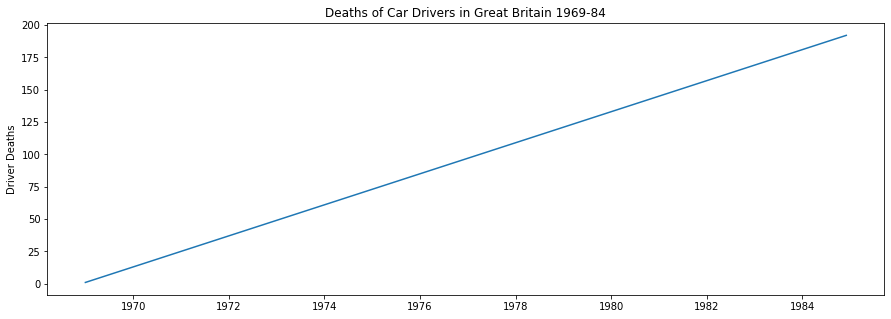

In [234]:
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;
plt.figure(figsize=(15,5));
plt.plot(data.index,data['driver']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

In [235]:
data

,driver,time,value,seat_belt,oil_crisis
time,,,,,
1969.000000,1,1969.000000,1687,0.0,0.0
1969.083333,2,1969.083333,1508,0.0,0.0
1969.166667,3,1969.166667,1507,0.0,0.0
1969.250000,4,1969.250000,1385,0.0,0.0
1969.333333,5,1969.333333,1632,0.0,0.0
...,...,...,...,...,...
1984.583333,188,1984.583333,1284,1.0,1.0
1984.666667,189,1984.666667,1444,1.0,1.0
1984.750000,190,1984.750000,1575,1.0,1.0
